In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
df = yf.download('^GSPC', start = '2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000
...,...,...,...,...,...,...
2023-08-28,4426.029785,4439.560059,4414.979980,4433.310059,4433.310059,2957230000
2023-08-29,4432.750000,4500.140137,4431.680176,4497.629883,4497.629883,3354820000
2023-08-30,4500.339844,4521.649902,4493.589844,4514.870117,4514.870117,3064110000


In [5]:
df.Low.rolling(5, center=True).min()

Date
2023-01-03            NaN
2023-01-04            NaN
2023-01-05    3794.330078
2023-01-06    3802.419922
2023-01-09    3802.419922
                 ...     
2023-08-28    4356.290039
2023-08-29    4356.290039
2023-08-30    4414.979980
2023-08-31            NaN
2023-09-01            NaN
Name: Low, Length: 168, dtype: float64

In [19]:
# let's check if Low price equals minimum of the "n" days:
n_days = 10
df[df.Low == df.Low.rolling(n_days,center=True).min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-19,3911.840088,3922.939941,3885.540039,3898.850098,3898.850098,3991500000
2023-02-10,4068.919922,4094.360107,4060.790039,4090.459961,4090.459961,3891520000
2023-03-02,3938.679932,3990.840088,3928.159912,3981.350098,3981.350098,4244900000
2023-03-13,3835.120117,3905.050049,3808.860107,3855.760010,3855.760010,6558020000
2023-04-26,4087.780029,4089.669922,4049.350098,4055.989990,4055.989990,3837030000
2023-05-04,4082.550049,4082.610107,4048.280029,4061.219971,4061.219971,4920090000
2023-05-24,4132.959961,4132.959961,4103.979980,4115.240234,4115.240234,3739160000
2023-06-26,4344.839844,4362.060059,4328.080078,4328.819824,4328.819824,3415030000
2023-08-18,4344.879883,4381.819824,4335.310059,4369.709961,4369.709961,3940400000


In [20]:
supports = df[df.Low == df.Low.rolling(n_days, center=True).min()].Low

In [21]:
# exact logic applies for resistance:

resistances = df[df.High == df.High.rolling(n_days, center = True).max()].High

In [22]:
# resistances

In [28]:
# here we will leave support and resistance if the difference is more than 100 points:
# we will leave higher resistance levels
# and lower support levels:

supports = supports[(supports.diff() > 50)|(supports.diff() < 0)]

In [29]:
resistances = resistances[(resistances.diff() < - 50)|(resistances.diff() > 0)]

In [30]:
# combine them to one dataframe:

levels = pd.concat([supports, resistances])

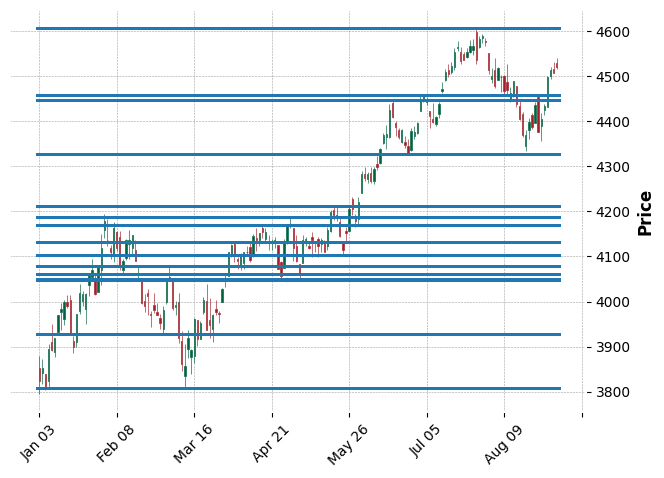

In [31]:
mpf.plot(df, type = 'candle', style = 'charles', hlines = levels.to_list())